In [18]:
import keras

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 


In [2]:
img=image.load_img(r"C:\Users\Tejaswini D\OneDrive\Desktop\computer vision\training\happy photos\images (1).jpeg")


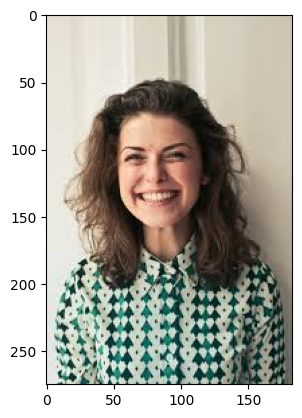

In [3]:
plt.imshow(img)

In [4]:
cv2.imread(r"C:\Users\Tejaswini D\OneDrive\Desktop\computer vision\training\happy photos\images (1).jpeg")


array([[[213, 223, 230],
        [213, 223, 230],
        [213, 223, 230],
        ...,
        [176, 193, 202],
        [176, 193, 202],
        [175, 192, 201]],

       [[213, 223, 230],
        [213, 223, 230],
        [213, 223, 230],
        ...,
        [176, 193, 202],
        [176, 193, 202],
        [176, 193, 202]],

       [[213, 223, 230],
        [213, 223, 230],
        [213, 223, 230],
        ...,
        [177, 194, 203],
        [176, 193, 202],
        [176, 193, 202]],

       ...,

       [[223, 236, 222],
        [226, 236, 224],
        [226, 233, 228],
        ...,
        [ 94, 102, 101],
        [ 98, 108, 108],
        [102, 114, 116]],

       [[221, 235, 224],
        [222, 235, 227],
        [226, 233, 230],
        ...,
        [ 94, 103, 100],
        [ 96, 108, 108],
        [101, 113, 115]],

       [[221, 235, 224],
        [222, 235, 227],
        [226, 233, 230],
        ...,
        [ 94, 103, 100],
        [ 96, 108, 108],
        [101, 113, 115]]

In [5]:
cv2.imread(r"C:\Users\Tejaswini D\OneDrive\Desktop\computer vision\training\happy photos\images (1).jpeg").shape


(275, 183, 3)

In [6]:
train=ImageDataGenerator(rescale=1/213)
validation=ImageDataGenerator(rescale=1/213)

In [7]:
train_dataset=train.flow_from_directory(r"C:\Users\Tejaswini D\OneDrive\Desktop\computer vision\training",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
                                        
validation_dataset=validation.flow_from_directory(r"C:\Users\Tejaswini D\OneDrive\Desktop\computer vision\validation",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')

Found 35 images belonging to 2 classes.
Found 35 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'happy photos': 0, 'sad photos': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

models=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                 ])

C:\Users\Tejaswini D\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
models.compile(loss='binary_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

In [13]:
models_fit=models.fit(train_dataset,
                      batch_size=32,
                      epochs=10,
                     validation_data=validation_dataset)

C:\Users\Tejaswini D\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 446ms/step - accuracy: 0.4037 - loss: 9.8664 - val_accuracy: 0.5429 - val_loss: 1.0040
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 301ms/step - accuracy: 0.5149 - loss: 0.7496 - val_accuracy: 0.4857 - val_loss: 0.7821
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 295ms/step - accuracy: 0.7020 - loss: 0.7895 - val_accuracy: 0.8286 - val_loss: 0.5976
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.7955 - loss: 0.5883 - val_accuracy: 0.5429 - val_loss: 2.1224
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.7474 - loss: 0.9515 - val_accuracy: 0.9714 - val_loss: 0.3726
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 256ms/step - accuracy: 0.9241 - loss: 0.4560 - val_accuracy: 0.8857 - val_loss: 0.3423
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - accuracy: 0.9202 - loss: 0.4052 - val_accuracy: 0.9714 - val_loss: 0.1142
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 302ms/step - accuracy: 0.8230 - loss: 0.2616 - val_accuracy: 0.

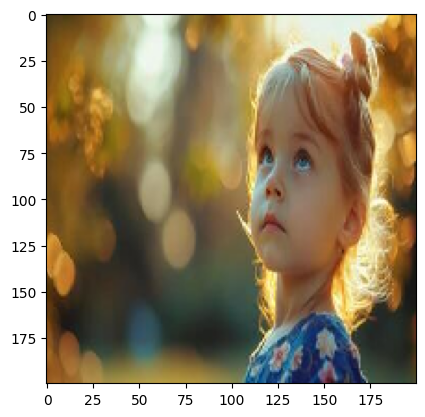

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
sad


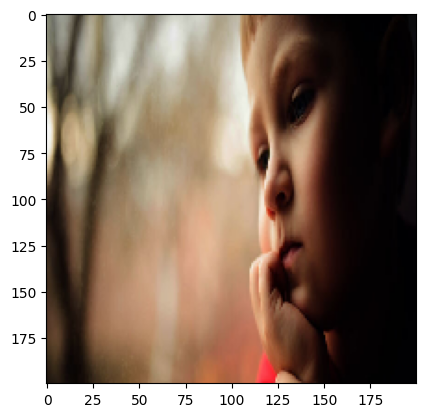

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
sad


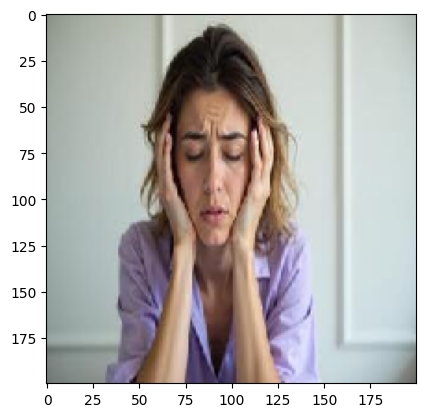

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
sad


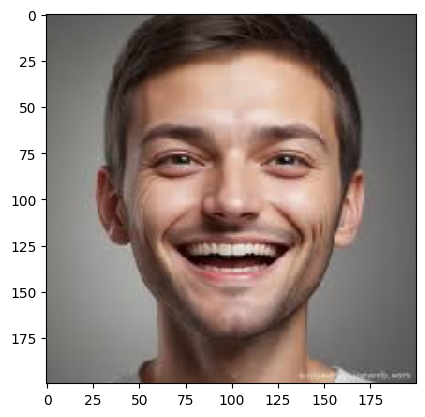

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
happy


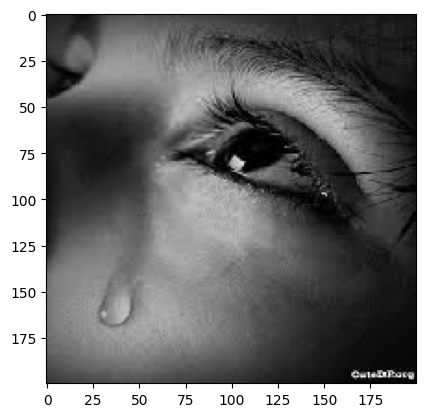

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
sad


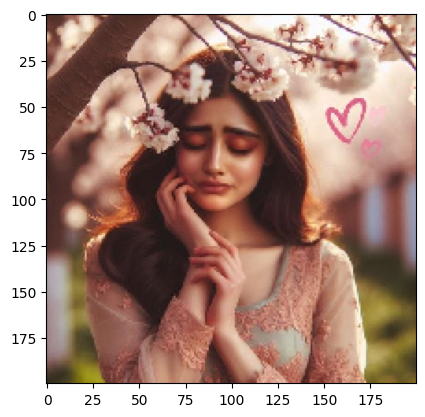

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
sad


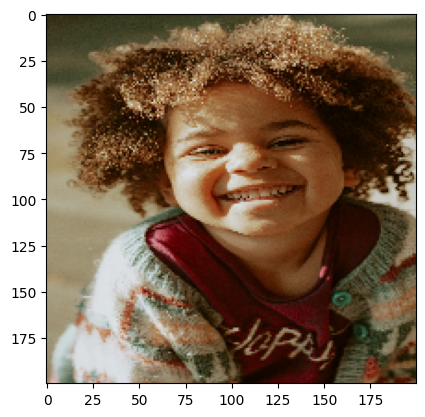

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
happy


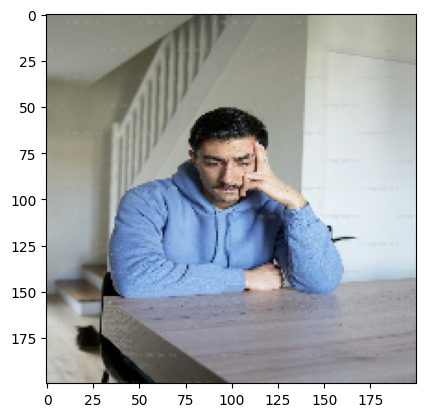

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
sad


In [30]:
from PIL import Image
from io import BytesIO
dir_path=(r"C:\Users\Tejaswini D\OneDrive\Desktop\computer vision\testing")
for i in os.listdir(dir_path ):
    img=image.load_img(dir_path+'//'+ i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

    
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis =0)
    images=np.vstack([x])
    val=models.predict(images)
    if val == 0:
        print("happy")
    else:
        print("sad")






In [68]:
pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25891 sha256=031226b3aa8a0fea1f2e81ba6ca8c448c3904a9e63c66ed9536f705d3c0e5596
  Stored in directory: c:\users\tejaswini d\appdata\local\pip\cache\wheels\5b\76\96\ad0c321506837bef578cf3008df3916c23018435a355d9f6b1
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [8]:
from imutils import paths

import cv2

In [3]:
imagePaths=list(paths.list_images(r"C:\Users\Tejaswini D\OneDrive\Desktop\computer vision\testing"))

In [4]:
imagePaths

['C:\\Users\\Tejaswini D\\OneDrive\\Desktop\\computer vision\\testing\\ai-generated-with-innocent-wonder-she-explores-the-magic-of-childhood-embracing-each-moment-with-wide-eyed-fascination-free-photo.jpeg',
 'C:\\Users\\Tejaswini D\\OneDrive\\Desktop\\computer vision\\testing\\boy+sad-0-800-0-328.jpeg',
 'C:\\Users\\Tejaswini D\\OneDrive\\Desktop\\computer vision\\testing\\close-up-of-person-head-stressed-about-hair-problem-photo.jpeg',
 'C:\\Users\\Tejaswini D\\OneDrive\\Desktop\\computer vision\\testing\\images (5).jpeg',
 'C:\\Users\\Tejaswini D\\OneDrive\\Desktop\\computer vision\\testing\\images.jpeg',
 'C:\\Users\\Tejaswini D\\OneDrive\\Desktop\\computer vision\\testing\\love-sad-dp-girl-1.jpeg',
 'C:\\Users\\Tejaswini D\\OneDrive\\Desktop\\computer vision\\testing\\photo-1624272949900-9ae4c56397e8.jpeg',
 'C:\\Users\\Tejaswini D\\OneDrive\\Desktop\\computer vision\\testing\\premium_photo-1669125725728-4cf8785623f0.jpeg']